In [355]:
import pandas as pd
import numpy as np

In [356]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/gender_submission.csv")

In [357]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [358]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [359]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [360]:
import random
np.random.seed(1234)
random.seed(1234)

In [361]:
##데이터의 행과 열 확인
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [362]:
# pd 에서 표시되는 행과 열 갯수 제한 변경
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [363]:
# train df 의 앞의 자료 확인
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [364]:
# test df 의 앞의 자료 확인
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


|변수명|뜻|의미|
|:------:|:---:|:---:|
|Survived|생존여부|0 = 사망, 1 = 생존|
|Pclass|티켓 등급|1 = 1등석, 2 = 2등석, 3 = 3등석|
|Sex|성별| |
|Age|나이| |
|SibSp|승선중인 형제나 배우자 수| |
|Parch|승선중인 부모나 자녀 수| |
|Ticket|티켓 번호| |
|Fare|요금| |
|Cabin|방 번호| |
|Embarked|승선한 항구 이름|C = Cherbourg, Q = Queenstown, S = Southampton|

In [365]:
# 데이터 속성 확인
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [366]:
# 데이터 값 대략 분석하기
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [367]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [368]:
# 특정 카테고리 별로 변수 확인하기
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [369]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [370]:
train_df["Cabin"].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
E101           3
              ..
C104           1
C99            1
E68            1
D28            1
C118           1
Name: Cabin, Length: 147, dtype: int64

In [371]:
# 각 카테고리 별로 빈 값 얼마나 있는지 확인
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [372]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [373]:
# 데이터 시각화 하기
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [374]:
# 표시 스타일 지정하기
plt.style.use("ggplot")

In [375]:
# 임의의 열 데이터 추출
train_df[["Embarked", "Survived", "PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [376]:
# 비어있는 값 있는 행 제거
train_df[["Embarked", "Survived", "PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [377]:
train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [378]:
# 수직 데이터를 수평으로 변환
embarked_df = train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()

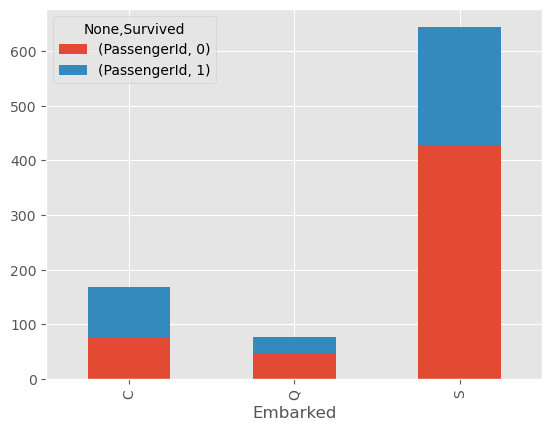

In [379]:
# 막대 그래프로 시각화
embarked_df.plot.bar(stacked = True)

In [380]:
#새로운 변수 survived_rate 추가하여 확인하기
embarked_df["survived_rate"] = embarked_df.iloc[:, 1] / (embarked_df.iloc[:, 0] + embarked_df.iloc[:, 1])
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.553571
Q                 47   30      0.389610
S                427  217      0.336957

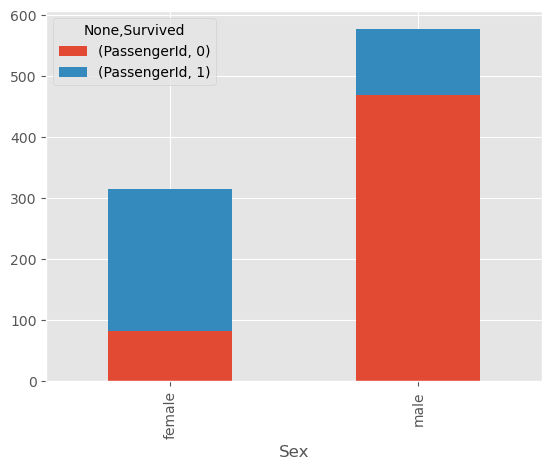

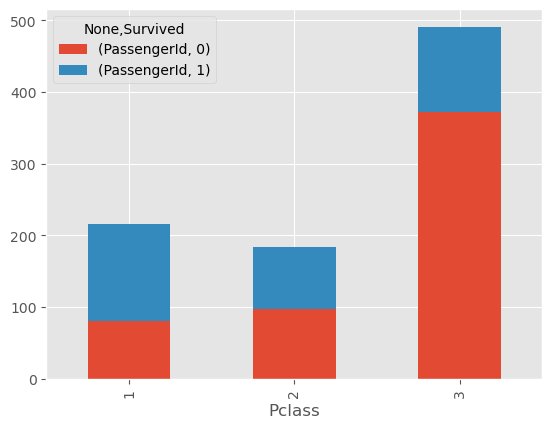

In [381]:
#성별과 티켓 등급 시각화
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df.plot.bar(stacked = True)

ticket_df = train_df[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)

이를 통해서 보면 티켓 등급이 높을수록 생존 비율이 높고 남성보다 여성이 더 많이 생존했다는 것을 알 수 있다

C:\Users\leedo\anaconda3\envs\kaggle_book\lib\site-packages\numpy\core\fromnumeric.py:3202: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
C:\Users\leedo\anaconda3\envs\kaggle_book\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


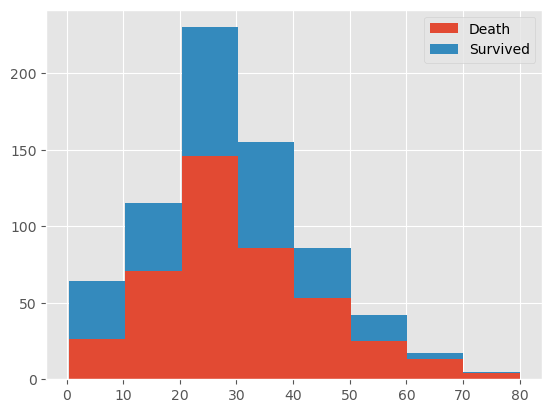

In [382]:
#연령별 생존율
#나이의 경우 연속적이기 때문에 히스토그램을 통해서 데이터 분석을 해야한다
plt.hist(x=[train_df.Age[train_df.Survived == 0], train_df.Age[train_df.Survived == 1]],
         bins = 8, histtype = 'barstacked', label = ["Death", "Survived"])
plt.legend()

Survived와 변수간의 상관성을 분석하기 위해서는 Sex나 Embarked등의 숫자가 아닌데이터를 숫자로 변환시켜야 한다.

각 카테고리 변수를 수치 데이터로 변환하기 위해서는 원 핫 인코딩을 이용하면 된다.

원 핫 인코딩이란 카테고리 변수에 대해 그 값이 맞는지 여부를 1 또는 0으로 나타내는 방법이다

In [383]:
train_df_corr = pd.get_dummies(train_df, columns = ["Sex"])
train_df_corr = pd.get_dummies(train_df_corr, columns = ["Embarked"])
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [384]:
#위에서 다듬을 데이터를 바탕으로 각 계수들간의 상관관계에 대하여 분석
train_corr = train_df_corr.corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359


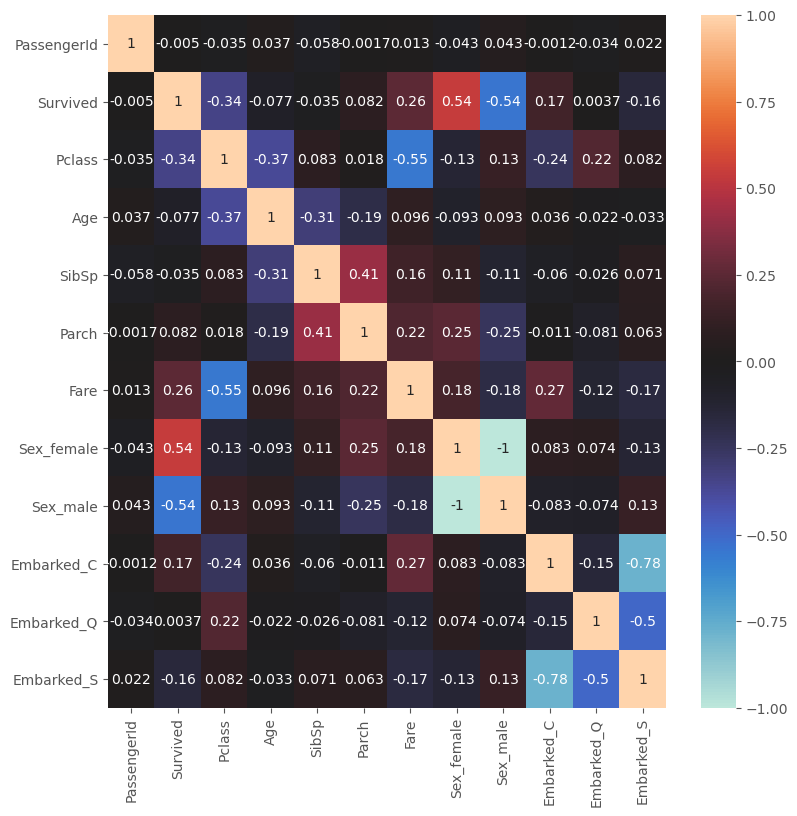

In [385]:
#히트맵으로 위의 상관관계를 시각화
plt.figure(figsize = (9, 9))
sns.heatmap(train_corr, vmax = 1, vmin = -1, center = 0, annot = True)

이를 통해서 성별이 가장 상관관계가 높고 그 다음이 티켓 등급이 Survived와 상관관계가 높다고 할 수있다.

그리고 Fare도 나름의 영향이 없지는 않다고 볼 수 있다.

다만 이러한 상관관계는 어디까지나 참고하면 좋은 것이고 실제로 연관이 있지만 표시되지 않는 경우도 있을 수 있음

In [386]:
#전제 데이터 통합
all_df = pd.concat([train_df, test_df], sort = False).reset_index(drop = True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [387]:
Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()
Fare_mean

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [388]:
Fare_mean.columns = ["Pclass", "Fare_mean"]
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [389]:
# Fare의 빈 값 채우기
all_df = pd.merge(all_df, Fare_mean, on = "Pclass", how = "left")
all_df.loc[(all_df["Fare"].isnull()),"Fare"] = all_df["Fare_mean"]
all_df = all_df.drop("Fare_mean", axis = 1)
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

pd.merge 에서 all_df과 Fare_mean을 on(Pclass)을 기준으로 데이터를 묶고

Fare의 값이 null인 위치의 Fare값을 Fare_mean값으로 대치한다

그리고 Fare_mean을 제거하고 결과가 잘 되었는지 확인한다

In [390]:
#이름을 변수화
name_df = all_df["Name"].str.split("[,.]", 2, expand = True)
name_df

,0,1,2
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [391]:
name_df.columns = ["family_name", "honorific", "name"]
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [392]:
for data in name_df.columns:
    name_df[data] = name_df[data].str.strip()

이름의 경우 성, 호칭, 이름 순으로 나오기 때문에 이를 분리해서 이름의 data frame을 만들었다

In [393]:
name_df["honorific"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Dona              1
Mme               1
Jonkheer          1
Capt              1
Lady              1
the Countess      1
Sir               1
Don               1
Name: honorific, dtype: int64

In [394]:
#이름을 all_df에 가로로 추가
all_df = pd.concat([all_df, name_df], axis = 1)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


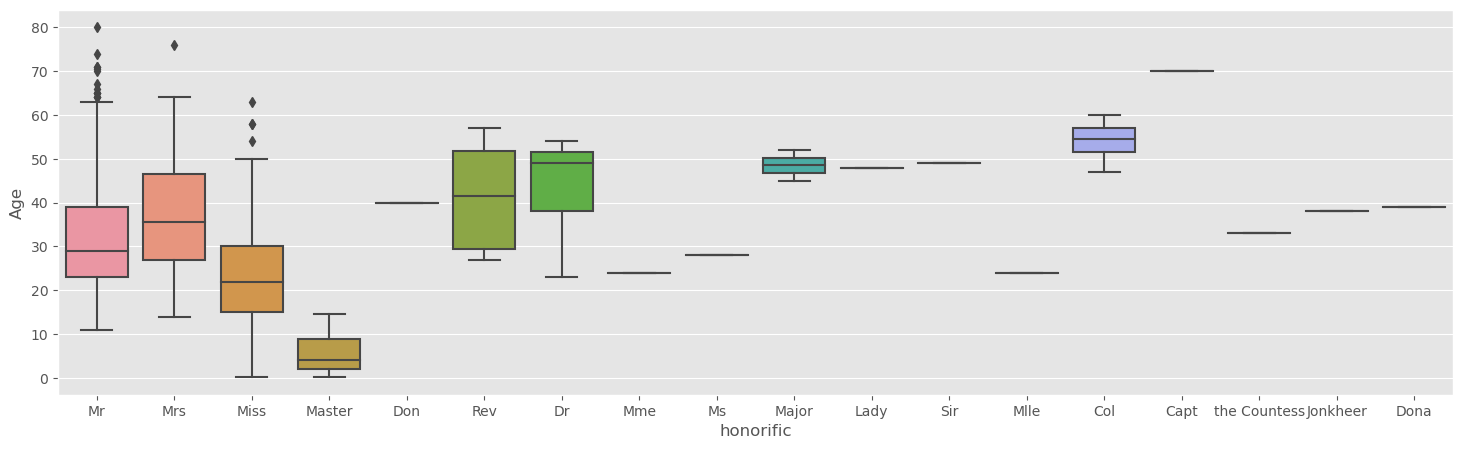

In [395]:
# boxplot으로 all_df의 호칭별 분포 시각화
plt.figure(figsize = (18, 5))
sns.boxplot(x = "honorific", y = "Age", data = all_df)

In [396]:
# 호칭별 생존율 차이 확인
#원래 dataframe에 name_df 결합
train_df = pd.concat([train_df, name_df[:len(train_df)].reset_index(drop = True)], axis = 1)
test_df = pd.concat([test_df, name_df[len(test_df):].reset_index(drop = True)], axis = 1)

name_df는 train과 test를 합친 all_df에서 구한것 이므로 각각에 해당하는 부분만 빼서 결합해야한다

reset_index 하는 이유는 dataframe이 다양한 전처리 과정을 거치게 되면 인덱스가 섞이게 되는데
그때 인덱스를 다시 처음부터 재배열 하기위해서이다.

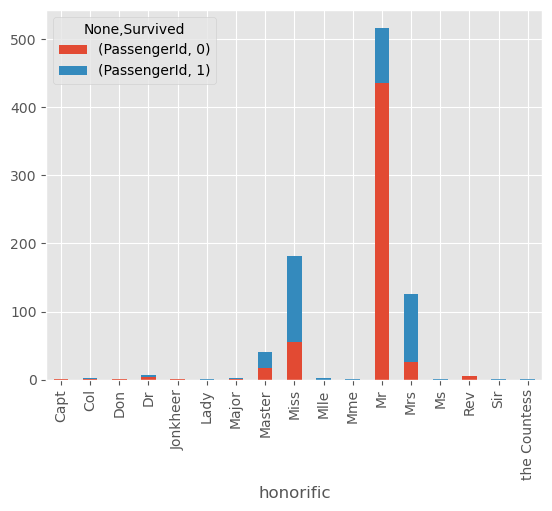

In [397]:
# 호칭별 생존여부 시각화
honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
honorific_df.plot.bar(stacked = True)

In [398]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
family_name       0
honorific         0
name              0
dtype: int64

In [399]:
#연령의 결측치를 호칭별 평균 연령으로 채우기
honorific_age_mean = all_df[["honorific", "Age"]].groupby("honorific").mean().reset_index()
honorific_age_mean.columns = ["honorific", "honorific_Age"]
all_df = pd.merge(all_df, honorific_age_mean, on = "honorific", how = "left")
all_df.loc[(all_df["Age"].isnull()),"Age"] = all_df["honorific_Age"]
all_df = all_df.drop(["honorific_Age"], axis = 1)
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
family_name       0
honorific         0
name              0
dtype: int64

In [400]:
# 가족 인원수 추가하기
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]
all_df["family_num"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

In [401]:
# 혼자 배에 탔는지 변수 추가하기
all_df.loc[all_df["family_num"] == 0, "alone"] = 1
all_df["alone"].fillna(0, inplace = True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,family_num,alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,1,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),1,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),1,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf,0,1.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina,0,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen,0,1.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick,0,1.0


이제 필요 없는 데이터를 제거한다

PassengerId의 경우 단순히 승객정보임으로 예측에 의미가 없다

Name의 경우 우리가 family_name, honorific, name으로 분리하였기 때문에 중복되는 내용이다

그리고 분할한 name의 경우도 단순히 승객의 정보임으로 예측에 의미가 없다

또한 family_name의 경우도 여러명을 작은 그룹으로 묶을 수 있는 것이 아니라 많은 그룹으로 조금의 사람이 묶이기 때문에 이를 이용하여 어떤 경우가 결과에 영향을 미치는지 판단하기 어렵다

Ticket의 경우도 단지 고객 정보이기 때문에 예측 의미가 없다

마지막으로 Cabin의 경우 데이터의 총 수가 1300여개인데 결손이 1000개가 넘어서 제대로 값을 알지 못함으로 의미가 없다

In [402]:
all_df = all_df.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"], axis = 1)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [403]:
# 숫자가 아닌 카테고리를 수치로 변환
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [404]:
# honorific에서 적은 비중 차지하는 호칭을 other로 묶기
all_df.loc[~((all_df["honorific"] == "Mr") | (all_df["honorific"] == "Miss") | (all_df["honorific"] == "Mrs") |
             (all_df["honorific"] == "Master"))] = "other"
all_df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

문자열을 수치로 변환할때 위의 pd.get_dummies()를 사용해 원 핫 인코딩을 하는 방법도 있지만
라벨 인코딩 기법을 사용할 수도 있다.

라벨 인코딩은 각 카테고리명을 임의의 숫자로 대체하는 방법이다

원 핫 인코딩의 경우는 카테고리의 수에 따라 변수가 증가하지만 라벨 인코딩은 변수는 그대로 유지하면서 수치로 바꿀 수 있다

In [405]:
from sklearn.preprocessing import LabelEncoder

In [406]:
# Embarked에 비어있는 곳을 missing으로 채움
all_df["Embarked"].fillna("missing", inplace=True)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0,3,male,22,1,0,7.25,S,Mr,1,0
1,1,1,female,38,1,0,71.2833,C,Mrs,1,0
2,1,3,female,26,0,0,7.925,S,Miss,0,1
3,1,1,female,35,1,0,53.1,S,Mrs,1,0
4,0,3,male,35,0,0,8.05,S,Mr,0,1


In [407]:
all_df.isnull().sum()

Survived      411
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
honorific       0
family_num      0
alone           0
dtype: int64

In [411]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])
all_df.head()

Sex
Embarked
honorific


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0,3,1,22,1,0,7.25,2,2,1,0
1,1,1,0,38,1,0,71.2833,0,3,1,0
2,1,3,0,26,0,0,7.925,2,1,0,1
3,1,1,0,35,1,0,53.1,2,3,1,0
4,0,3,1,35,0,0,8.05,2,2,0,1


In [412]:
# 데이터를 학습 데이터와 테스트 데이터로 만들기
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis = 1).reset_index(drop = True)
train_Y = train_df["Survived"]
test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis = 1).reset_index(drop = True)

Survived의 값이 null이 아닌경우는 학습데이터로 하고 null인 경우는 테스트 데이터로 하고
Survived의 값을 목적변수로 한다